Mar 04, 2021 <br>
Will try to cluster again
- police data
- agglomerative clustering
- dendrogram
- analyze clusters

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import folium
from matplotlib import pyplot as plt 
from scipy.cluster import hierarchy
from sklearn.cluster import AgglomerativeClustering
from pathlib import Path
from geopy.geocoders import Nominatim
%matplotlib inline

### Import and clean police data

In [2]:
# import police dataset
pol_df = pd.read_csv('pol_df.csv',encoding = "ISO-8859-1")
pol_df.head()

,Unnamed: 0,Neighborhood,Sex Offences,Assaults,Robbery,Break & Enter,Auto Theft,Other Theft,Offensive Weapons
0,0,VPD Arbutus Ridge,0.009524,0.003778,0.001608,0.016613,0.009393,0.006241,0.000000
1,1,VPD Central_Business_District,0.316190,0.404222,0.414791,0.169968,0.133671,0.372350,0.537123
2,2,VPD Dunbar-Southlands,0.011429,0.003556,0.003215,0.018104,0.009393,0.008954,0.002320
3,3,VPD Fairview,0.049524,0.026444,0.020900,0.067519,0.034682,0.060001,0.019722
4,4,VPD Grandview-Woodland,0.059048,0.052444,0.056270,0.062194,0.088150,0.040634,0.024362


In [3]:
# set neighborhood column as index
pol_df.set_index(pol_df['Neighborhood'], drop=True, inplace=True)
pol_df.drop(['Neighborhood','Unnamed: 0'], axis=1, inplace=True)
pol_df.head()

,Sex Offences,Assaults,Robbery,Break & Enter,Auto Theft,Other Theft,Offensive Weapons
Neighborhood,,,,,,,
VPD Arbutus Ridge,0.009524,0.003778,0.001608,0.016613,0.009393,0.006241,0.000000
VPD Central_Business_District,0.316190,0.404222,0.414791,0.169968,0.133671,0.372350,0.537123
VPD Dunbar-Southlands,0.011429,0.003556,0.003215,0.018104,0.009393,0.008954,0.002320
VPD Fairview,0.049524,0.026444,0.020900,0.067519,0.034682,0.060001,0.019722
VPD Grandview-Woodland,0.059048,0.052444,0.056270,0.062194,0.088150,0.040634,0.024362


In [4]:
pol_df.shape

(73, 7)

In [5]:
pol_df

,Sex Offences,Assaults,Robbery,Break & Enter,Auto Theft,Other Theft,Offensive Weapons
Neighborhood,,,,,,,
VPD Arbutus Ridge,0.009524,0.003778,0.001608,0.016613,0.009393,0.006241,0.000000
VPD Central_Business_District,0.316190,0.404222,0.414791,0.169968,0.133671,0.372350,0.537123
VPD Dunbar-Southlands,0.011429,0.003556,0.003215,0.018104,0.009393,0.008954,0.002320
VPD Fairview,0.049524,0.026444,0.020900,0.067519,0.034682,0.060001,0.019722
VPD Grandview-Woodland,0.059048,0.052444,0.056270,0.062194,0.088150,0.040634,0.024362
...,...,...,...,...,...,...,...
SPVM 42.0,0.025549,0.034652,0.032677,0.027023,0.067577,0.032958,0.040698
SPVM 45.0,0.021461,0.019887,0.020947,0.015013,0.035871,0.013192,0.020349
SPVM 46.0,0.021972,0.016271,0.019690,0.014870,0.027771,0.024708,0.008721


### Exploratory Data Analysis

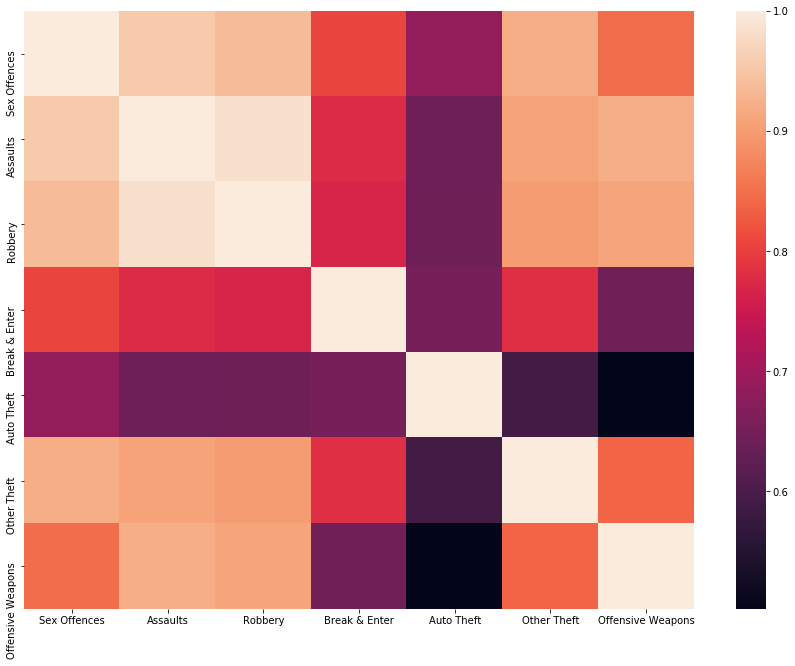

In [6]:
# heatmap
plt.figure(figsize=(15,11))
corr_mtx = pol_df.corr()
sns.heatmap(corr_mtx)

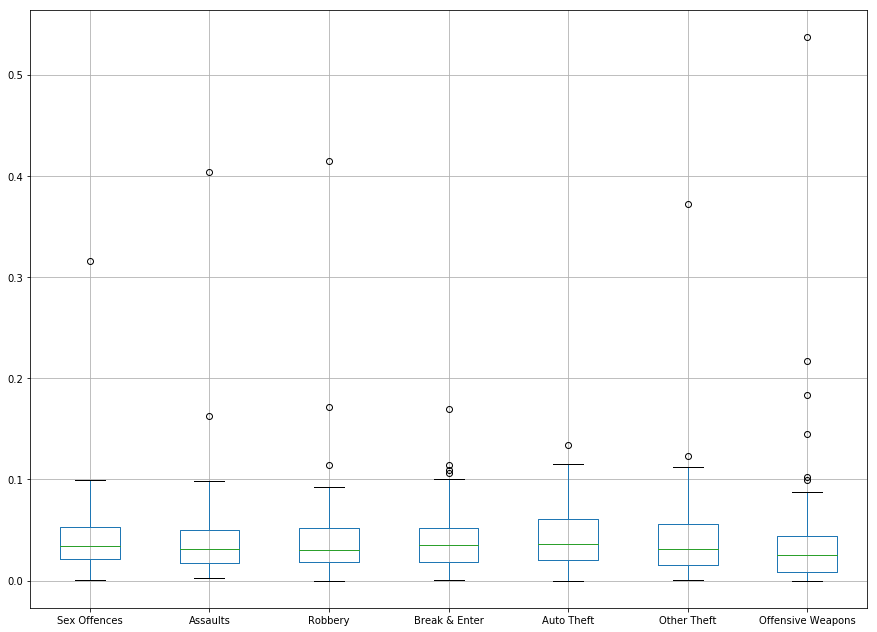

In [7]:
plt.figure(figsize=(15,11))
pol_df.boxplot()

### Modeling

In [8]:
feature_mtx = pol_df.values
feature_mtx[:5]

array([[0.00952381, 0.00377778, 0.00160772, 0.01661342, 0.00939306,
        0.00624088, 0.        ],
       [0.31619048, 0.40422222, 0.414791  , 0.16996805, 0.13367052,
        0.37235017, 0.53712297],
       [0.01142857, 0.00355556, 0.00321543, 0.01810437, 0.00939306,
        0.00895431, 0.00232019],
       [0.04952381, 0.02644444, 0.02090032, 0.06751864, 0.03468208,
        0.06000068, 0.01972158],
       [0.05904762, 0.05244444, 0.0562701 , 0.06219382, 0.08815029,
        0.04063359, 0.02436195]])

In [9]:
feature_mtx.shape

(73, 7)

In [10]:
# function to plot dendrogram from model result

n=feature_mtx.shape[0]

def llf(id):
    if id < n:
        return '%d %s' % (id, pol_df.index[id])
    else:
        return '[%d %d]' % (id, linkage_matrix[id-n,3])


def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count
    
    global linkage_matrix
    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    hierarchy.dendrogram(linkage_matrix, leaf_label_func=llf, leaf_rotation=90, **kwargs)
    return linkage_matrix

In [11]:
model = AgglomerativeClustering(n_clusters=None, linkage="ward", distance_threshold=0.2)
model.fit(feature_mtx)
print(model.labels_)
print(model.n_clusters_)

[5 3 5 1 1 6 1 5 5 6 6 1 5 5 1 6 5 5 5 0 6 5 2 5 1 1 1 2 1 1 1 1 6 2 1 0 0
 2 1 2 5 6 5 6 1 6 5 6 6 1 4 5 6 6 2 2 6 5 5 6 6 6 5 6 2 6 6 1 6 5 5 1 6]
7


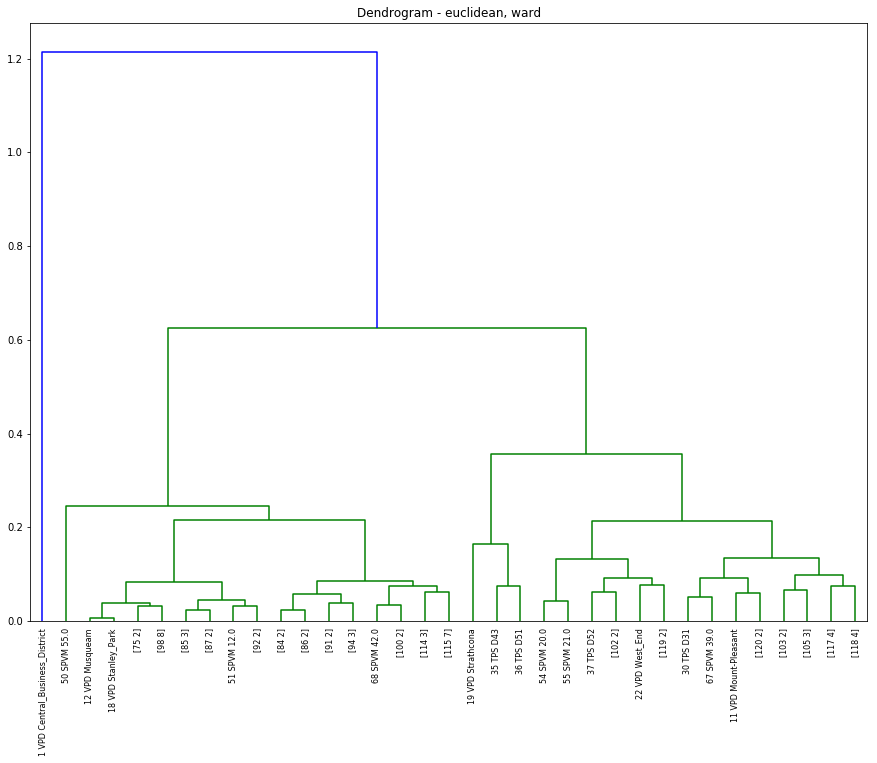

In [12]:
plt.figure(figsize=(15,11))
plt.title('Dendrogram - euclidean, ward')
plot_dendrogram(model, truncate_mode='level', p=6)
plt.show()

### Analyze Clusters

In [13]:
model.labels_.shape

(73,)

In [14]:
pol_df["Cluster Labels"] = model.labels_
pol_df.head()

,Sex Offences,Assaults,Robbery,Break & Enter,Auto Theft,Other Theft,Offensive Weapons,Cluster Labels
Neighborhood,,,,,,,,
VPD Arbutus Ridge,0.009524,0.003778,0.001608,0.016613,0.009393,0.006241,0.000000,5
VPD Central_Business_District,0.316190,0.404222,0.414791,0.169968,0.133671,0.372350,0.537123,3
VPD Dunbar-Southlands,0.011429,0.003556,0.003215,0.018104,0.009393,0.008954,0.002320,5
VPD Fairview,0.049524,0.026444,0.020900,0.067519,0.034682,0.060001,0.019722,1
VPD Grandview-Woodland,0.059048,0.052444,0.056270,0.062194,0.088150,0.040634,0.024362,1


In [15]:
# How many neighborhoods in each cluster
pol_df.groupby('Cluster Labels').count()

,Sex Offences,Assaults,Robbery,Break & Enter,Auto Theft,Other Theft,Offensive Weapons
Cluster Labels,,,,,,,
0,3,3,3,3,3,3,3
1,18,18,18,18,18,18,18
2,8,8,8,8,8,8,8
3,1,1,1,1,1,1,1
4,1,1,1,1,1,1,1
5,20,20,20,20,20,20,20
6,22,22,22,22,22,22,22


In [16]:
# mean for each feature in each cluster
clus_mean = pol_df.groupby('Cluster Labels').mean()
clus_mean

,Sex Offences,Assaults,Robbery,Break & Enter,Auto Theft,Other Theft,Offensive Weapons
Cluster Labels,,,,,,,
0,0.080871,0.119097,0.126281,0.097628,0.083149,0.068234,0.153613
1,0.051778,0.047795,0.050611,0.050713,0.067087,0.048682,0.040154
2,0.068982,0.068059,0.064160,0.073187,0.044280,0.091260,0.060140
3,0.316190,0.404222,0.414791,0.169968,0.133671,0.372350,0.537123
4,0.001022,0.002109,0.000000,0.000143,0.000000,0.006282,0.183140
5,0.012952,0.009658,0.009952,0.014849,0.015457,0.011092,0.005752
6,0.031695,0.029019,0.026502,0.033714,0.033906,0.026749,0.022726


In [17]:
# total crime
clus_mean.sum(axis=1).sort_values()

Cluster Labels
5    0.079712
4    0.192695
6    0.204310
1    0.356820
2    0.470068
0    0.728873
3    2.348315
dtype: float64

In [18]:
import matplotlib.colors as mcolors
mcolors.TABLEAU_COLORS

OrderedDict([('tab:blue', '#1f77b4'),
             ('tab:orange', '#ff7f0e'),
             ('tab:green', '#2ca02c'),
             ('tab:red', '#d62728'),
             ('tab:purple', '#9467bd'),
             ('tab:brown', '#8c564b'),
             ('tab:pink', '#e377c2'),
             ('tab:gray', '#7f7f7f'),
             ('tab:olive', '#bcbd22'),
             ('tab:cyan', '#17becf')])

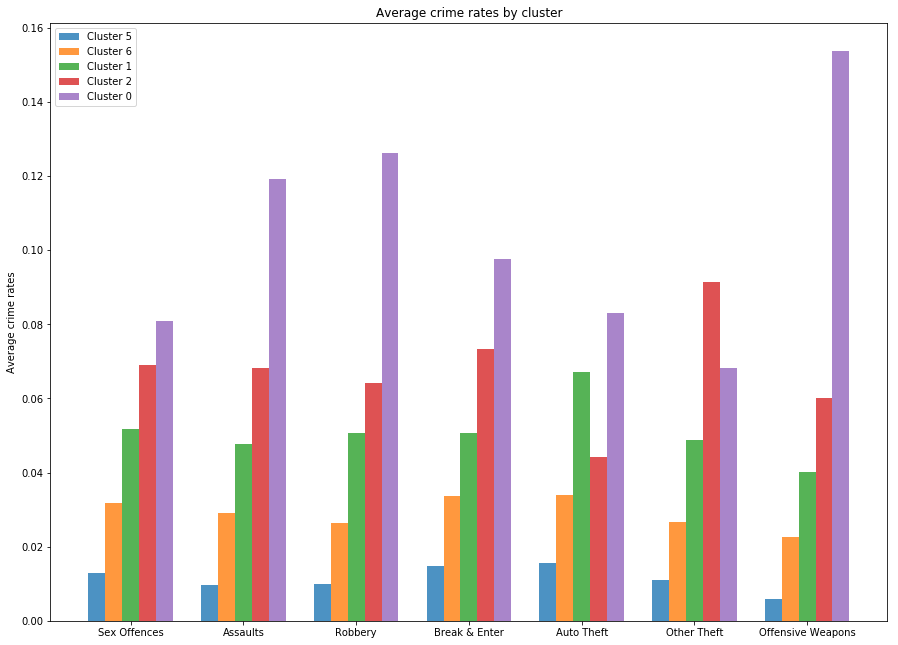

In [19]:
plt.figure(figsize=(15,11))

index = np.arange(7)
bar_width = 0.15
opacity = 0.8

rects1 = plt.bar(index, clus_mean.loc[5], bar_width,
                 alpha=opacity,
                 color='tab:blue',
                 label='Cluster 5')

rects2 = plt.bar(index+bar_width, clus_mean.loc[6], bar_width,
                 alpha=opacity,
                 color='tab:orange',
                 label='Cluster 6')

rects3 = plt.bar(index+bar_width*2, clus_mean.loc[1], bar_width,
                 alpha=opacity,
                 color='tab:green',
                 label='Cluster 1')

rects4 = plt.bar(index+bar_width*3, clus_mean.loc[2], bar_width,
                 alpha=opacity,
                 color='tab:red',
                 label='Cluster 2')

rects5 = plt.bar(index+bar_width*4, clus_mean.loc[0], bar_width,
                 alpha=opacity,
                 color='tab:purple',
                 label='Cluster 0')


plt.ylabel('Average crime rates')
plt.title('Average crime rates by cluster')
plt.xticks(index + bar_width*2, clus_mean.columns)
plt.legend()

plt.show()

In [20]:
pol_df_no_ol = pol_df.loc[pol_df['Cluster Labels']!=3]
pol_df_no_ol = pol_df_no_ol.loc[pol_df['Cluster Labels']!=4]
pol_df_no_ol.head()

,Sex Offences,Assaults,Robbery,Break & Enter,Auto Theft,Other Theft,Offensive Weapons,Cluster Labels
Neighborhood,,,,,,,,
VPD Arbutus Ridge,0.009524,0.003778,0.001608,0.016613,0.009393,0.006241,0.000000,5
VPD Dunbar-Southlands,0.011429,0.003556,0.003215,0.018104,0.009393,0.008954,0.002320,5
VPD Fairview,0.049524,0.026444,0.020900,0.067519,0.034682,0.060001,0.019722,1
VPD Grandview-Woodland,0.059048,0.052444,0.056270,0.062194,0.088150,0.040634,0.024362,1
VPD Hastings-Sunrise,0.051429,0.026222,0.019293,0.041960,0.061416,0.031069,0.008121,6


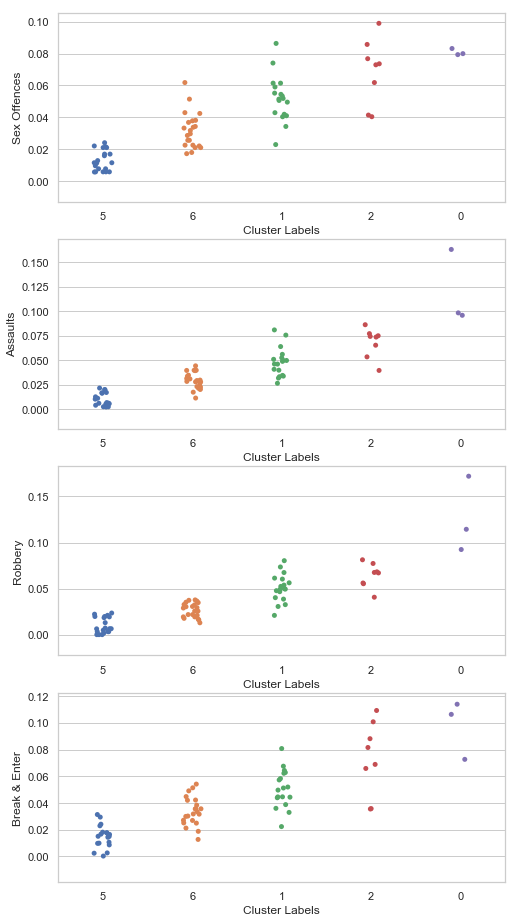

In [21]:
sns.set_theme(style='whitegrid')
order = [5,6,1,2,0]
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(8,16))
sns.stripplot(x='Cluster Labels', y='Sex Offences', order=order, data=pol_df_no_ol, ax=ax1)
sns.stripplot(x='Cluster Labels', y='Assaults', order=order, data=pol_df_no_ol, ax=ax2)
sns.stripplot(x='Cluster Labels', y='Robbery', order=order, data=pol_df_no_ol, ax=ax3)
sns.stripplot(x='Cluster Labels', y='Break & Enter', order=order, data=pol_df_no_ol, ax=ax4)

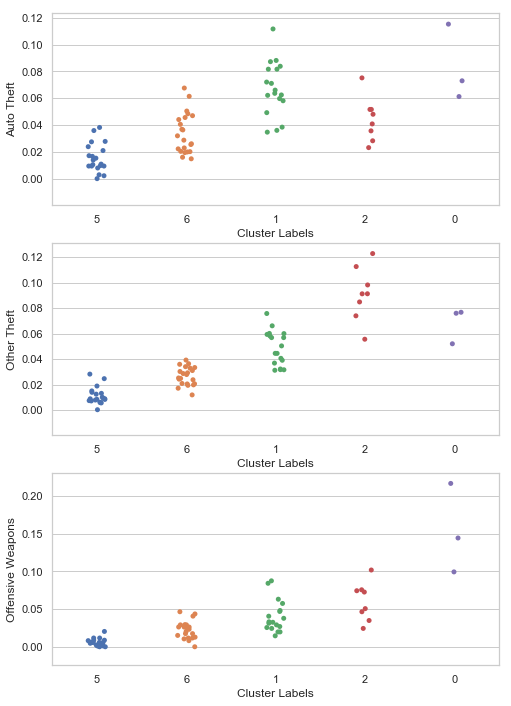

In [22]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(8,12))
sns.stripplot(x='Cluster Labels', y='Auto Theft', order=order, data=pol_df_no_ol, ax=ax1)
sns.stripplot(x='Cluster Labels', y='Other Theft', order=order, data=pol_df_no_ol, ax=ax2)
sns.stripplot(x='Cluster Labels', y='Offensive Weapons', order=order, data=pol_df_no_ol, ax=ax3)

__-----------------------------------------------------------------------------------------------OPTIONAL----------------------------------------------------------------------------------------------__

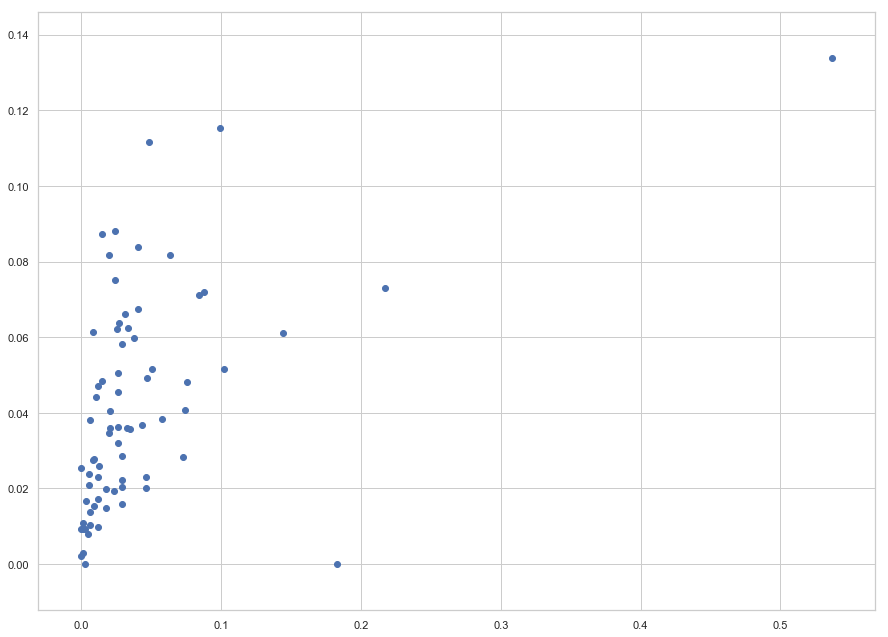

In [23]:
# scatter plot for offensive weapons and auto theft since they dont correlate
plt.figure(figsize=(15,11))
plt.scatter(pol_df['Offensive Weapons'], pol_df['Auto Theft'])

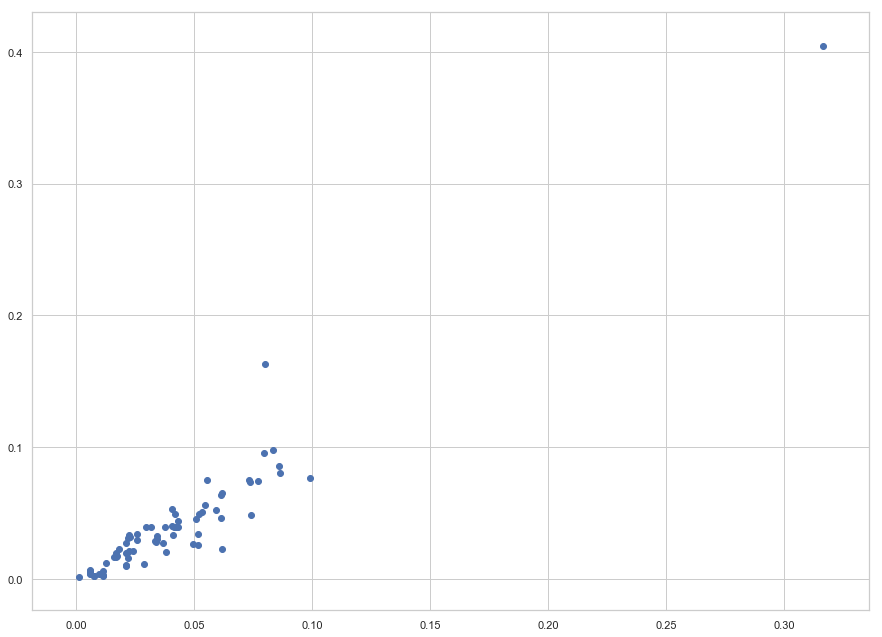

In [24]:
# scatter plot for offensive weapons and auto theft since they dont correlate
plt.figure(figsize=(15,11))
plt.scatter(pol_df['Sex Offences'], pol_df['Assaults'])

__---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------__

### Visualize Clusters on Map
- will create three maps, one for each city
- the circle markers correspond to neighborhoods
- the colors of the dots correspond to Clusters

In [25]:
folder = Path('C:/Users/jasmine/Desktop/IBM data science/9-Data Science Capstone/police reports')
addresses = folder / 'all addresses.csv'

add_df = pd.read_csv(addresses, header=None)

print(add_df.shape)
add_df.head()

(73, 2)


,0,1
0,Arbutus Ridge,"Arbutus Ridge Vancouver, BC"
1,Central_Business_District,"Vancouver City Center Vancouver, BC"
2,Dunbar-Southlands,"Dunbar-Southlands Vancouver, BC"
3,Fairview,"Fairview Vancouver, BC"
4,Grandview-Woodland,"Grandview-Woodland Vancouver, BC"


In [26]:
add_df.set_index(pol_df.index, drop=True, inplace=True)
add_df

,0,1
Neighborhood,,
VPD Arbutus Ridge,Arbutus Ridge,"Arbutus Ridge Vancouver, BC"
VPD Central_Business_District,Central_Business_District,"Vancouver City Center Vancouver, BC"
VPD Dunbar-Southlands,Dunbar-Southlands,"Dunbar-Southlands Vancouver, BC"
VPD Fairview,Fairview,"Fairview Vancouver, BC"
VPD Grandview-Woodland,Grandview-Woodland,"Grandview-Woodland Vancouver, BC"
...,...,...
SPVM 42.0,42,"8181 Boulevard Lacordaire, Saint-Léonard, QC"
SPVM 45.0,45,"8200 Boulevard Maurice-Duplessis, Montréal, QC"
SPVM 46.0,46,"6850, boulevard Joseph-Renaud, Anjou, Montréal..."


In [27]:
add_df = add_df[[1]]
add_df.columns = ['Address']
add_df.head()

,Address
Neighborhood,
VPD Arbutus Ridge,"Arbutus Ridge Vancouver, BC"
VPD Central_Business_District,"Vancouver City Center Vancouver, BC"
VPD Dunbar-Southlands,"Dunbar-Southlands Vancouver, BC"
VPD Fairview,"Fairview Vancouver, BC"
VPD Grandview-Woodland,"Grandview-Woodland Vancouver, BC"


In [28]:
# get lat and long
lat = []
long = []
geolocator = Nominatim(user_agent='neigh_explorer')
for address in add_df['Address'].tolist():
    loc = geolocator.geocode(address, country_codes='ca')
    if loc==None:
        print(address)
    else:
        lat.append(loc.latitude)
        long.append(loc.longitude)

In [29]:
add_df['Latitude'] = lat
add_df['Longitude'] = long
add_df.head()

,Address,Latitude,Longitude
Neighborhood,,,
VPD Arbutus Ridge,"Arbutus Ridge Vancouver, BC",49.246305,-123.159636
VPD Central_Business_District,"Vancouver City Center Vancouver, BC",49.282471,-123.118628
VPD Dunbar-Southlands,"Dunbar-Southlands Vancouver, BC",49.237864,-123.184354
VPD Fairview,"Fairview Vancouver, BC",49.261956,-123.130408
VPD Grandview-Woodland,"Grandview-Woodland Vancouver, BC",49.275849,-123.066934


In [30]:
A = pol_df
B = add_df
premium_pol_df = pd.merge(A, B, left_index=True, right_index=True)
premium_pol_df.head()

,Sex Offences,Assaults,Robbery,Break & Enter,Auto Theft,Other Theft,Offensive Weapons,Cluster Labels,Address,Latitude,Longitude
Neighborhood,,,,,,,,,,,
VPD Arbutus Ridge,0.009524,0.003778,0.001608,0.016613,0.009393,0.006241,0.000000,5,"Arbutus Ridge Vancouver, BC",49.246305,-123.159636
VPD Central_Business_District,0.316190,0.404222,0.414791,0.169968,0.133671,0.372350,0.537123,3,"Vancouver City Center Vancouver, BC",49.282471,-123.118628
VPD Dunbar-Southlands,0.011429,0.003556,0.003215,0.018104,0.009393,0.008954,0.002320,5,"Dunbar-Southlands Vancouver, BC",49.237864,-123.184354
VPD Fairview,0.049524,0.026444,0.020900,0.067519,0.034682,0.060001,0.019722,1,"Fairview Vancouver, BC",49.261956,-123.130408
VPD Grandview-Woodland,0.059048,0.052444,0.056270,0.062194,0.088150,0.040634,0.024362,1,"Grandview-Woodland Vancouver, BC",49.275849,-123.066934


In [31]:
vpd = []
tps = []
spvm = []
for neigh in premium_pol_df.index: 
    vpd.append('VPD' in neigh)
    tps.append('TPS' in neigh)
    spvm.append('SPVM' in neigh)
vpd_df = premium_pol_df[vpd]
tps_df = premium_pol_df[tps]
spvm_df = premium_pol_df[spvm]

In [32]:
print(vpd_df.shape)
print(tps_df.shape)
print(spvm_df.shape)

(24, 11)
(16, 11)
(33, 11)


In [33]:
vpd_df

,Sex Offences,Assaults,Robbery,Break & Enter,Auto Theft,Other Theft,Offensive Weapons,Cluster Labels,Address,Latitude,Longitude
Neighborhood,,,,,,,,,,,
VPD Arbutus Ridge,0.009524,0.003778,0.001608,0.016613,0.009393,0.006241,0.000000,5,"Arbutus Ridge Vancouver, BC",49.246305,-123.159636
VPD Central_Business_District,0.316190,0.404222,0.414791,0.169968,0.133671,0.372350,0.537123,3,"Vancouver City Center Vancouver, BC",49.282471,-123.118628
VPD Dunbar-Southlands,0.011429,0.003556,0.003215,0.018104,0.009393,0.008954,0.002320,5,"Dunbar-Southlands Vancouver, BC",49.237864,-123.184354
VPD Fairview,0.049524,0.026444,0.020900,0.067519,0.034682,0.060001,0.019722,1,"Fairview Vancouver, BC",49.261956,-123.130408
VPD Grandview-Woodland,0.059048,0.052444,0.056270,0.062194,0.088150,0.040634,0.024362,1,"Grandview-Woodland Vancouver, BC",49.275849,-123.066934
VPD Hastings-Sunrise,0.051429,0.026222,0.019293,0.041960,0.061416,0.031069,0.008121,6,"Hastings-Sunrise Vancouver, BC",49.278714,-123.039998
VPD Kensington-Cedar_Cottage,0.051429,0.034444,0.038585,0.043876,0.062139,0.036903,0.025522,1,"Kensington-Cedar Cottage Vancouver, BC",49.246790,-123.073475
VPD Kerrisdale,0.005714,0.004000,0.004823,0.029393,0.016618,0.008513,0.003480,5,"Kerrisdale Vancouver, BC",49.220985,-123.159548
VPD Killarney,0.020952,0.011111,0.006431,0.016400,0.027457,0.014008,0.008121,5,"Killarney Vancouver, BC",49.218012,-123.037115


In [34]:
# Vancouver coordinates
geolocator = Nominatim(user_agent='neigh_explorer')
van = geolocator.geocode('Vancouver', country_codes='ca')

In [35]:
color_dictionary = {5:'#FFC300', 6:'#FF5733', 1:'#C70039', 2:'#900C3F', 0:'#581845', 4:'#FDFEFE', 3:'#FDFEFE'}
label_dictionary = {5:'very low crime', 6:'low crime', 1:'medium crime', 2:'high crime', 0:'very high crime', 
                    4:'OUTLIER: very low in all except offensive weapons',
                    3:'OUTLIER: exceptionally high crime'}
line_color = '#1C2833'

In [36]:
van_map_clusters = folium.Map(location=[van.latitude, van.longitude], zoom_start=12)

for lat, long, neigh, clus in zip(vpd_df['Latitude'], vpd_df['Longitude'], vpd_df.index, vpd_df['Cluster Labels']):
    
    folium.CircleMarker(location=[lat, long], 
                        radius=10, 
                        popup=label_dictionary[clus]+'. ' +neigh, 
                        fill=True,
                        fill_opacity=1,
                        fill_color=color_dictionary[clus],
                        color=line_color).add_to(van_map_clusters)
    
van_map_clusters

In [37]:
# Toronto coordinates
geolocator = Nominatim(user_agent='neigh_explorer')
tor = geolocator.geocode('Toronto', country_codes='ca')

In [38]:
tor_map_clusters = folium.Map(location=[tor.latitude, tor.longitude], zoom_start=11)

for lat, long, neigh, clus in zip(tps_df['Latitude'], tps_df['Longitude'], tps_df.index, tps_df['Cluster Labels']):
    
    folium.CircleMarker(location=[lat, long], 
                        radius=10, 
                        popup=label_dictionary[clus]+'. ' +neigh, 
                        fill=True,
                        fill_opacity=1,
                        fill_color=color_dictionary[clus],
                        color=line_color).add_to(tor_map_clusters)
    
tor_map_clusters

In [39]:
# Montreal coordinates
geolocator = Nominatim(user_agent='neigh_explorer')
mon = geolocator.geocode('Montreal', country_codes='ca')

In [40]:
mon_map_clusters = folium.Map(location=[mon.latitude, mon.longitude], zoom_start=11)

for lat, long, neigh, clus in zip(spvm_df['Latitude'], spvm_df['Longitude'], spvm_df.index, spvm_df['Cluster Labels']):
    
    folium.CircleMarker(location=[lat, long], 
                        radius=10, 
                        popup=label_dictionary[clus]+'. ' +neigh, 
                        fill=True,
                        fill_opacity=1,
                        fill_color=color_dictionary[clus],
                        color=line_color).add_to(mon_map_clusters)
    
mon_map_clusters